## 案例：出口商品总额对国内生产总值的影响

<center>
    姓名：叶家辉 <br>
    学号：201800830004
</center>

### 一、提出问题

在之前二三章研究的线性回归模型中，我们做出了同方差性的假定，即要求多所有的$i(i = 1,2,...,n)$都有

$$Var(u_i) = \sigma^2$$

因为方差是度量被解释变量$Y$的观测值围绕回归线$E(Y_i)=\beta_1+\beta_2X_{2i}+\beta_3X_{3i}+...+\beta_kX_{ki}$的分散程度，因此同方差性指的是所有观测值的分散程度相同。

设模型为

$$Y_i=\beta_1+\beta_2X_{2i}+\beta_3X_{3i}+...+\beta_kX_{ki}+u_i\ \ \ \ (i = 1,2,...,n)$$

如果其他假定不变，但模型中随机误差项$u_i$的方差为

$$Var(u_i) = \sigma_i^2\ \ \ \ (i = 1,2,...,n)$$

则称$u_i$具有异方差性。更进一步，如果把异方差看作是由于某个解释变量的变化而引起的，则

$$Var(u_i) = \sigma_i^2 = \sigma^2f(X_i)$$

通常，模型设定的误差（忽略了某些重要的解释变量或模型函数形式不正确）、测量误差的变化和截面数据中总体各单位的差异通常都会带来异方差。如果模型存在异方差，则对模型参数估计式的统计特性、模型的假设检验和模型的预测都会产生影响。所以，对模型异方差性的检验和消除成为了一个重要的课题。

为此，我们通过一个具体的案例来研究这一流程。一国的出口商品总额常常是经济发展水平的重要指标，也会一定程度上对国内生产总值产生影响。为此，更真实可靠地探究中国出口商品总额对GDP的影响，就显得尤为关键。

### 二、模型设定

在之后的模型中，我们令$X$代表出口商品总额（亿元），$Y$代表GDP（亿元）。我们首先读入数据，并观察其特点。

      时间         X         Y
0   1991    3827.1   22005.6
1   1992    4676.3   27194.5
2   1993    5284.8   35673.2
3   1994   10421.8   48637.5
4   1995   12451.8   61339.9
5   1996   12576.4   71813.6
6   1997   15160.7   79715.0
7   1998   15223.6   85195.5
8   1999   16159.8   90564.4
9   2000   20634.4  100280.1
10  2001   22024.4  110863.1
11  2002   26947.9  121717.4
12  2003   36287.9  137422.0
13  2004   49103.3  161840.2
14  2005   62648.1  187318.9
15  2006   77597.2  219438.5
16  2007   93627.1  270232.3
17  2008  100394.9  319515.5
18  2009   82029.7  349081.4
19  2010  107022.8  413030.3
20  2011  123240.6  489300.6
21  2012  129359.3  540367.4
22  2013  137131.4  595244.4
23  2014  143883.7  643974.0
24  2015  141166.8  685505.8


Text(0, 0.5, 'Y')

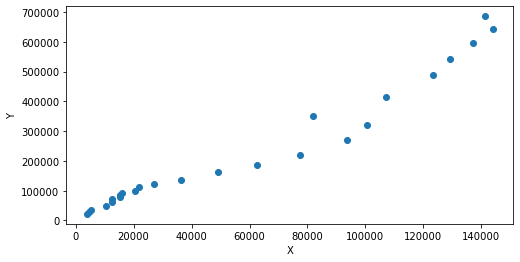

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据读入为DataFrame
df = pd.read_excel('data.xlsx',header=0)
df.rename(columns = {'GDP':'Y','EXPORT':'X'},inplace = True)
print(df)

plt.figure(figsize = (8,4))
plt.scatter(df['X'],df['Y'])
plt.xlabel("X")
plt.ylabel("Y")

可以看出，$Y$与$X$成正相关，且基本符合线性变化，因此设定如下模型：

$$Y_i = \beta_1 + \beta_2X_i + u_i$$

### 三、参数估计

和前几章一样，我们使用OLS对模型的参数进行估计。

In [2]:
import statsmodels.formula.api as smf

est1 = smf.ols(formula='Y ~ X', data=df).fit()

# 打印系数
print(est1.params)
# 打印回归结果
print(est1.summary())

Intercept   -673.086253
X              4.061131
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     405.5
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           4.17e-16
Time:                        02:00:25   Log-Likelihood:                -304.82
No. Observations:                  25   AIC:                             613.6
Df Residuals:                      23   BIC:                             616.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

从中我们可以得到

$$ \hat{Y_i} = -673.086253 + 4.061131 * X_i$$

$$ SE = (1.54e+04)\ \ (0.202)$$

$$ t = (-0.044)\ \ (20.137)$$

$$ R^2 = 0.946\ \ \ \ \overline{R^2} = 0.944\ \ \ \ F = 405.5\ \ \ \ df = 23 $$

然而，这样的结论显然是不可靠的：出口商品总额每增加1亿元，GDP就能增加4.061131亿元，出口对GDP的拉动作用也太可怕了！

其实从上面的Y-X散点图中可以看出，随着$X$的增大，$Y$的离散程度有逐渐增大的趋势，这表明模型可能存在一定的异方差性。如果是这样的话，那OLS估计方法的效果就不能保证，同时$t$检验也失去了意义。

为了用更充分的理由说明这个结论的荒谬性，并寻找更真实的结论，我们就需要对模型的异方差性进行检验，并对此加以修正。

### 四、异方差性检验

#### 4.1 White检验

White检验不需要关于异方差的任何先验信息，只需要在大样本的情况下，将OLS估计后的残差平方对常数、解释变量、解释变量的平方及其交叉乘积等构成辅助回归，利用辅助回归建立相应的检验统计量来判断异方差性。

White检验的步骤如下：

1. 用OLS估计原模型$Y_i = \beta_1 + \beta_2X_i + u_i$，计算残差$e_t = Y_t - \hat{Y_t}$，并求其平方。

In [3]:
est2 = smf.ols(formula='Y ~ X', data=df).fit()
df['e2'] = (df['Y'] - est2.predict(df['X']))**2
print(df)

      时间         X         Y            e2
0   1991    3827.1   22005.6  5.092725e+07
1   1992    4676.3   27194.5  7.879263e+07
2   1993    5284.8   35673.2  2.215341e+08
3   1994   10421.8   48637.5  4.880832e+07
4   1995   12451.8   61339.9  1.309789e+08
5   1996   12576.4   71813.6  4.584859e+08
6   1997   15160.7   79715.0  3.541361e+08
7   1998   15223.6   85195.5  5.780927e+08
8   1999   16159.8   90564.4  6.558940e+08
9   2000   20634.4  100280.1  2.942663e+08
10  2001   22024.4  110863.1  4.880662e+08
11  2002   26947.9  121717.4  1.677425e+08
12  2003   36287.9  137422.0  8.602221e+07
13  2004   49103.3  161840.2  1.361730e+09
14  2005   62648.1  187318.9  4.412962e+09
15  2006   77597.2  219438.5  9.028949e+09
16  2007   93627.1  270232.3  1.195228e+10
17  2008  100394.9  319515.5  7.661189e+09
18  2009   82029.7  349081.4  2.762629e+08
19  2010  107022.8  413030.3  4.380726e+08
20  2011  123240.6  489300.6  1.107228e+08
21  2012  129359.3  540367.4  2.463478e+08
22  2013  1

2. 用残差平方$e_t^2$作为异方差$\sigma_t^2$的估计，做辅助函数$e_t^2 = \alpha_0 + \alpha_1x_t + \alpha_2x_t^2 + v_t$，并用OLS对其做估计。

In [4]:
df['X2'] = df['X']**2
est3 = smf.ols(formula='e2 ~ X + X2', data=df).fit()

# 打印回归结果
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                     e2   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.493
Date:                Sat, 18 Dec 2021   Prob (F-statistic):             0.0231
Time:                        02:00:25   Log-Likelihood:                -582.41
No. Observations:                  25   AIC:                             1171.
Df Residuals:                      22   BIC:                             1174.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.005e+09   1.43e+09     -0.700      0.4

3. 计算统计量$nR^2 = 7.25$。

4. 假设$H_0: \alpha_1 = \alpha2 = 0$，则可证明$nR^2$渐进服从自由度为$p$的$\chi^2$分布，$p=2$。$\alpha = 0.05$时查表得$\chi_{0.05}^2(2) = 5.9915$，因为$nR^2 = 7.25 > \chi_{0.05}^2(2) = 5.9915$，所以拒绝原假设，即表明模型存在异方差。

#### 4.2 ARCH检验

ARCH检验是一种针对时间序列的异方差检验方法，其思想是，在时间序列数据中，可认为存在的异方差性为ARCH过程，并通过检验这一过程是否成立去判断时间序列有无异方差性。

设二阶的ARCH过程为

$$\sigma_t^2 = \alpha_0 + \alpha_1\sigma_{t-1}^2 + \alpha_2\sigma_{t-2}^2 + v_t$$

并且$\alpha_0 > 0, \alpha_i \geq 0\ \ (i = 1,2)$

ARCH检验的步骤如下：

1. 提出假设$H_0: \alpha_1 = \alpha_2 = 0$。

2. 对原模型做OLS估计，求出残差$e_t$，并计算残差平方序列$e_t^2, e_{t-1}^2, e_{t-2}^2$，分别作为对$\sigma_t^2, \sigma_{t-1}^2, \sigma_{t-2}^2$的估计。

In [5]:
import numpy as np

est4 = smf.ols(formula='Y ~ X', data=df).fit()
df['e2t'] = (df['Y'] - est4.predict(df['X']))**2

# 计算残差平方序列
df.loc[0,'e2t1'] = 0
df.loc[1:,'e2t1'] = np.array(df.loc[:len(df)-2,'e2t'])
df.loc[0,'e2t2'] = 0
df.loc[1:,'e2t2'] = np.array(df.loc[:len(df)-2,'e2t1'])

print(df)

      时间         X         Y            e2            X2           e2t  \
0   1991    3827.1   22005.6  5.092725e+07  1.464669e+07  5.092725e+07   
1   1992    4676.3   27194.5  7.879263e+07  2.186778e+07  7.879263e+07   
2   1993    5284.8   35673.2  2.215341e+08  2.792911e+07  2.215341e+08   
3   1994   10421.8   48637.5  4.880832e+07  1.086139e+08  4.880832e+07   
4   1995   12451.8   61339.9  1.309789e+08  1.550473e+08  1.309789e+08   
5   1996   12576.4   71813.6  4.584859e+08  1.581658e+08  4.584859e+08   
6   1997   15160.7   79715.0  3.541361e+08  2.298468e+08  3.541361e+08   
7   1998   15223.6   85195.5  5.780927e+08  2.317580e+08  5.780927e+08   
8   1999   16159.8   90564.4  6.558940e+08  2.611391e+08  6.558940e+08   
9   2000   20634.4  100280.1  2.942663e+08  4.257785e+08  2.942663e+08   
10  2001   22024.4  110863.1  4.880662e+08  4.850742e+08  4.880662e+08   
11  2002   26947.9  121717.4  1.677425e+08  7.261893e+08  1.677425e+08   
12  2003   36287.9  137422.0  8.602221

3. 做辅助函数：$\hat{e_t}^2 = \hat{\alpha_0} + \hat{\alpha_1}e_{t-1}^2 + \hat{\alpha_2}e_{t-2}^2$，并用OLS对其做估计。

In [6]:
est5 = smf.ols(formula='e2t ~ e2t1 + e2t2', data=df).fit()

# 打印回归结果
print(est5.summary())

                            OLS Regression Results                            
Dep. Variable:                    e2t   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     19.37
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.41e-05
Time:                        02:00:25   Log-Likelihood:                -574.00
No. Observations:                  25   AIC:                             1154.
Df Residuals:                      22   BIC:                             1158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.047e+09    5.6e+08      1.871      0.0

得到可决系数$R^2 = 0.638$，可证明$(n-p)R^2$渐进服从自由度为$p$的$\chi^2$分布，$p=2$。$\alpha = 0.05$时查表得$\chi_{0.05}^2(2) = 5.9915$，因为$(n-p)R^2 = 14.674 > \chi_{0.05}^2(2) = 5.9915$，所以拒绝原假设，即表明模型存在异方差。

### 五、异方差性修正

对异方差进行修正一般有三种方法：

* 模型变换法：适用于已知异方差形式的情况

* 加权最小二乘法：最常用的修正方法，实际上与模型变换法是等价的

* 模型对数变换法：需要考虑模型的经济学意义，即变量间是否具备对数线性关系。

#### 5.1 加权最小二乘法

在我们的模型

$$Y_i = \beta_1 + \beta_2X_i + u_i$$

中，经检验存在异方差，且

$$Var(u_i) = \sigma_i^2 = \sigma^2f(X_i)$$

加权最小二乘的想法是，对于不同的样本给予不同的权重，即对较小的$e_i^2$给予较大的权数，对较大的$e_i^2$给予较小的权数。通常可将权数取为$w_i = {1\over\sigma_i^2}\ \ (i = 1,2,...,n$)，将权数与残差平方和相乘后再求和，得

$$\sum{w_ie_i^2} = \sum{w_i(Y_i-\hat{\beta_1}-\hat{\beta_2}X_i)^2}$$

称为加权的残差平方和。根据最小二乘原理，即要使得

$$min\sum{w_ie_i^2} = min\sum{w_i(Y_i-\hat{\beta_1}-\hat{\beta_2}X_i)^2}$$

可得

$$\hat{\beta_1^*} = \overline{Y}^* - \hat{\beta}_2^*\overline{X}^*$$

$$\hat{\beta_2^*} = { {\sum{w_i(X_i - \overline{X}^*)(Y_i - \overline{Y}^*)}} \over \sum{w_i(X_i - \overline{X}^*)^2} }$$

其中

$$\overline{X}^* = { {\sum w_iX_i} \over {\sum w_i} }$$

$$\overline{Y}^* = { {\sum w_iY_i} \over {\sum w_i} }$$

下面我们按照步骤实现一下。$e_i^2$在前面已经计算过了，直接用即可。据此计算每个样本的权重。

In [7]:
df['w'] = 1/df['e2']

计算$\overline{X}^*$和$\overline{Y}^*$。

In [8]:
X_star = (df.loc[:,'X'] * df.loc[:,'w']).sum() / df.loc[:,'w'].sum()
Y_star = (df.loc[:,'Y'] * df.loc[:,'w']).sum() / df.loc[:,'w'].sum()
print(X_star, Y_star)

31356.140304015065 133157.65306699194


计算$\hat{\beta_2^*}$和$\hat{\beta_1^*}$。

In [9]:
# 分子部分
beta2_star = (df.loc[:,'w']*(df.loc[:,'X']-X_star)*(df.loc[:,'Y']-Y_star)).sum()
# 除以分母
beta2_star /= (df.loc[:,'w']*(df.loc[:,'X']-X_star)**2).sum()

beta1_star = Y_star - beta2_star * X_star

print(beta1_star, beta2_star)

8819.842005272847 3.9653417115817025


得到的模型为

$$ \hat{Y_i} = 8819.842005272847 + 3.9653417115817025 * X_i$$

以下我们用python自带的包进行验证。

In [10]:
import statsmodels.api as sm

est6 = sm.WLS(df['Y'],sm.add_constant(df['X']),weights = df['w']).fit()
print(est6.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3818.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           4.53e-27
Time:                        02:00:26   Log-Likelihood:                -283.60
No. Observations:                  25   AIC:                             571.2
Df Residuals:                      23   BIC:                             573.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8819.8420   3287.850      2.683      0.0

同样可以得到结果：

$$ \hat{Y_i} = 8819.8420 + 3.9653 * X_i$$

$$ SE = (3287.850)\ \ (0.064)$$

$$ t = (2.683)\ \ (61.792)$$

$$ R^2 = 0.994\ \ \ \ \overline{R^2} = 0.994\ \ \ \ F = 3818$$

然而这样的结果还是不够让人信服。一方面，经White检验发现其异方差性还是较大，另一方面从经济意义的角度，出口商品总额每增加1亿元，GDP就能增加3.9653亿元，也不是太合理。因此我们考虑对数变换法。

#### 5.2 对数变换法

建立模型

$$lnY_i = \beta_1 + \beta_2lnX_i + u_i$$

然后对模型参数进行估计：

In [11]:
df['lnY'] = np.log(df['Y'])
df['lnX'] = np.log(df['X'])
est7 = smf.ols('lnY ~ lnX',data=df).fit()
print(est7.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnY   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     808.5
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           2.01e-19
Time:                        02:00:26   Log-Likelihood:                 9.4830
No. Observations:                  25   AIC:                            -14.97
Df Residuals:                      23   BIC:                            -12.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9897      0.316      9.456      0.0

得到模型：

$$ ln\hat{Y_i} = 2.9897 + 0.8559 * lnX_i$$

$$ SE = (0.316)\ \ (0.030)$$

$$ t = (9.456)\ \ (28.434)$$

$$ R^2 = 0.972\ \ \ \ \overline{R^2} = 0.971\ \ \ \ F = 808.5$$

可以看出无论是$t$检验还是$F$检验模型都很显著。经济意义上表示出口商品总额每增加1%，GDP就能增加0.8559%，这也比较合理。

下面来通过White检验分析一下模型的异方差性。

In [12]:
df['ee'] = (df['lnY'] - est7.predict(df['lnX']))**2
df['lnX2'] = df['lnX']**2
est8 = smf.ols('ee ~ lnX + lnX2',data=df).fit()
print(est8.summary())

                            OLS Regression Results                            
Dep. Variable:                     ee   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     3.546
Date:                Sat, 18 Dec 2021   Prob (F-statistic):             0.0463
Time:                        02:00:26   Log-Likelihood:                 54.158
No. Observations:                  25   AIC:                            -102.3
Df Residuals:                      22   BIC:                            -98.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0100      0.549      0.018      0.9

计算统计量$nR^2 = 6.1$。假设$H_0: \alpha_1 = \alpha2 = 0$，则可证明$nR^2$渐进服从自由度为$p$的$\chi^2$分布，$p=2$。$\alpha = 0.05$时查表得$\chi_{0.05}^2(2) = 5.9915$。$nR^2 = 6.1$虽然还是大于$\chi_{0.05}^2(2) = 5.9915$，但相对于之前已经有了明显改进。